### 1. Load data, implement the model, loss function and GD 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11] #input feature vectors
Y = df.values[:, 11] # target values
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:n_samples * n_features
    w: weights
    
    return Y_hat
    '''
    # 
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization Algo 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1) #w^0
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation

In [ ]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X1,Y,test_size = 0.3, random_state = 123)


#print(X_train.shape, X_test.shape)
print("X_train shape is: " , X_train.shape)
print("X_test shape is: " , X_test.shape)

X_train shape is:  (3428, 11)
X_test shape is:  (1470, 11)


In [ ]:
## 2.2 Model training using the training set and the GD function
w_star, loss_hist, w_hist = GD(X_train, Y_train, lr = 0.00001, delta = 0.01, max_iter = 100)
print ( "w_star: \n", w_star )
print ( "loss_hist: \n", loss_hist )
print ( "w_hist: \n", w_hist )


/var/folders/53/42g8tbt17tngxpy9ywjvz0c00000gn/T/ipykernel_64558/3853184538.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


0 loss: 34059.03316456032
1 loss: 30253.680604467
2 loss: 26892.219684105243
3 loss: 23922.862620983804
4 loss: 21299.8636103045
5 loss: 18982.813919368135
6 loss: 16936.019221922856
7 loss: 15127.94957768347
8 loss: 13530.753581653084
9 loss: 12119.829196683138
10 loss: 10873.444656150437
11 loss: 9772.40359516957
12 loss: 8799.749250284896
13 loss: 7940.503169599857
14 loss: 7181.434407079049
15 loss: 6510.855644494901
16 loss: 5918.443099423845
17 loss: 5395.077444220671
18 loss: 4932.703284661675
19 loss: 4524.205032936795
20 loss: 4163.29726229442
21 loss: 3844.42785379306
22 loss: 3562.6924427300783
23 loss: 3313.7588464364862
24 loss: 3093.800308931537
25 loss: 2899.436533791536
26 loss: 2727.6815965972955
27 loss: 2575.8979343333817
28 loss: 2441.7557027532175
29 loss: 2323.1968754400586
30 loss: 2218.403531359573
31 loss: 2125.7698422409667
32 loss: 2043.8773281349925
33 loss: 1971.4729998570883
34 loss: 1907.4500515084728
35 loss: 1850.830805562637
36 loss: 1800.751647714883


In [ ]:
## 2.3. calculating mse&mae values on the training set and test set, respectively.

#training error
Y_train_hat = predict(X_train, w_star)

mse_train = 1/(X_train.shape[0]) * sum ((Y_train_hat - Y_train)**2)
mae_train = 1/(X_train.shape[0]) * sum(abs(Y_train_hat - Y_train ))
#print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------
print('training mse: {} and training mae:{}'.format(mse_train, mae_train))

## test error
Y_test_hat = predict(X_test, w_star)

mse_test = 1/(X_test.shape[0]) * sum ((Y_test_hat - Y_test)**2)
mae_test = 1/(X_test.shape[0]) * sum (abs(Y_test_hat - Y_test))



#print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
print('test mse: {} and test mae:{}'.format(mse_test, mae_test))

training mse: 0.8122266409538739 and training mae:0.7047839782751879
test mse: 0.7649748037877527 and test mae:0.6828609579578603


/var/folders/53/42g8tbt17tngxpy9ywjvz0c00000gn/T/ipykernel_64558/3853184538.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


### 3. SGD implementation
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):)

In [ ]:
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)   
    print("w1 is", w)
    w_hist = np.zeros((epoch, w.shape[0])) 
    loss_hist = np.zeros(epoch)           

    loss_hist = np.zeros(epoch) # history of loss
    w_hist = np.zeros((epoch, w.shape[0])) # history of weight
    loss_w = 0
    i = 0     
    
    for i in range(epoch):       
        #(1) Shuffle data (X and Y) at the beginning of each epoch. 
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        #(2) go through all minibatches and update w. 
        for b in range(int(m/batch_size)):
            # prepare the b mininath X_batch and Y_batch.        
            start_idx = b * batch_size 
            end_idx = start_idx + batch_size
                        
            X_batch = X_shuffled[start_idx:end_idx]
            Y_batch = Y_shuffled[start_idx:end_idx]

            #prepare A_batch and b_batch.      
            m_batch = len(Y_batch)
            A_batch = np.c_[np.ones((m_batch, 1)), X_batch]
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])

            #gradient calcualation and w update. 
            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch)            
            w = w - lr*gradient    
            print ("i is {}, b is {},X_batch.shape is {} and A_batch.shape is {}".format(i, b, X_batch.shape, A_batch.shape))
        ## (3) Save the loss(on whole training set) and current weight for each epoch. 
        w_hist[i,:] = w.T
        loss_w = loss(w, X_shuffled, Y_shuffled)
        loss_hist[i] = loss_w
        print("i is {} and lost_hist is {}".format(i, loss_hist[i]))
        print("i is {} and w_hist is {}".format(i, w_hist[i,:]))
        #print(i, loss_hist[i])
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
        i = i + 1
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets 

In [ ]:
batch_size = 32
n_epochs = 100

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, Y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

w_star_SGD
#(1) print out the predicted wine quality values and the true quality 
Y_hat = predict(X_train, w_star_SGD)
print("Y_True:",Y_train[:10])
print("Y_hat:", Y_hat)

#(2) model's mse and mae on the training set using w_star_SGD. 
Y_train_hat = predict(X_train, w_star_SGD)

mse_train = 1/(X_train.shape[0]) * sum ((Y_train_hat - Y_train)**2)
mae_train = 1/(X_train.shape[0]) * sum(abs(Y_train_hat - Y_train ))
print("mse_train: ", mse_train)
print("mae_train: ", mae_train)

#(3) model's mse and mae on the test set.
Y_test_hat = predict(X_test, w_star_SGD)

mse_test = 1/(X_test.shape[0]) * sum ((Y_test_hat - Y_test)**2)
mae_test = 1/(X_test.shape[0]) * sum (abs(Y_test_hat - Y_test))
print("mse_test: ", mse_test)
print("mae_test: ", mae_test)


w1 is [[0.01037415]
 [0.50187459]
 [0.49577329]
 [0.13382953]
 [0.14211109]
 [0.21855868]
 [0.41850818]
 [0.24810117]
 [0.08405965]
 [0.34549864]
 [0.16677635]
 [0.87855909]]
i is 0, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 0, b is 11,X_batch.shape is (32, 11) a

/var/folders/53/42g8tbt17tngxpy9ywjvz0c00000gn/T/ipykernel_64558/3853184538.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


i is 2 and lost_hist is 2854.487878600924
i is 2 and w_hist is [2.25048449 1.15161493 0.90966871 0.5836255  0.34116028 0.45715087
 0.67882255 0.90513784 0.3757494  1.29102463 0.86405984 1.81042153]
i is 3, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3, b is 11,X_ba

i is 5 and lost_hist is 1443.3828159442319
i is 5 and w_hist is [2.63542267 1.2589995  0.96625555 0.65923635 0.37628928 0.49450884
 0.7226558  1.0087228  0.42269641 1.4444413  0.9758921  1.9779338 ]
i is 6, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6, b is 11,X_b

i is 8 and lost_hist is 1321.9304286607567
i is 8 and w_hist is [2.73729881 1.28487062 0.97236911 0.67825881 0.38616778 0.50222515
 0.73377411 1.03060098 0.43324568 1.47959622 1.00051202 2.02651778]
i is 9, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9, b is 11,X_b

i is 11 and lost_hist is 1301.7341088986418
i is 11 and w_hist is [2.7739793  1.29271839 0.96944077 0.68451711 0.39008404 0.5037487
 0.73750044 1.03529133 0.43598465 1.48909342 1.00652502 2.04637568]
i is 12, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 12

i is 14 and lost_hist is 1295.8292678461173
i is 14 and w_hist is [2.79095548 1.29557651 0.96540159 0.68710537 0.39207367 0.50380329
 0.73908466 1.03579285 0.4366939  1.49184949 1.00781817 2.05679385]
i is 15, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 15, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 1

i is 17 and lost_hist is 1293.2978867038519
i is 17 and w_hist is [2.8000895  1.29670122 0.96185121 0.68832937 0.39324266 0.50349007
 0.73986721 1.03519827 0.43678906 1.49249421 1.00774234 2.06302775]
i is 18, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 18, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 1

i is 20 and lost_hist is 1291.9262523640145
i is 20 and w_hist is [2.80546896 1.29714979 0.95900949 0.68896523 0.3939899  0.50312546
 0.74028536 1.03438249 0.43669359 1.49240481 1.00729451 2.06703649]
i is 21, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 21, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 2

i is 23 and lost_hist is 1291.0676234572643
i is 23 and w_hist is [2.80894156 1.29734395 0.95685201 0.68933469 0.39449826 0.50281274
 0.74053966 1.0336629  0.43656858 1.49215349 1.00682391 2.06976115]
i is 24, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 24, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 2

i is 26 and lost_hist is 1290.4984186749552
i is 26 and w_hist is [2.81123511 1.29741672 0.95523031 0.68955843 0.39485066 0.50255921
 0.74069895 1.03306727 0.4364477  1.4918659  1.00640488 2.07164437]
i is 27, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 27, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 2

i is 29 and lost_hist is 1290.107726961746
i is 29 and w_hist is [2.81279257 1.29743526 0.95402617 0.68969862 0.39509802 0.5023619
 0.74080011 1.03260081 0.43634649 1.49161388 1.0060645  2.07296027]
i is 30, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 30,

i is 32 and lost_hist is 1289.8326984710511
i is 32 and w_hist is [2.81387428 1.29743482 0.95313802 0.68978998 0.39527382 0.50221338
 0.74086914 1.03224521 0.43626557 1.49140213 1.00579902 2.07389826]
i is 33, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 33, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 3

i is 35 and lost_hist is 1289.636962831512
i is 35 and w_hist is [2.81463639 1.29742645 0.95248642 0.6898514  0.39540039 0.50210207
 0.74091542 1.03197833 0.43620356 1.49123685 1.00559784 2.07456985]
i is 36, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 36

i is 38 and lost_hist is 1289.4957883354907
i is 38 and w_hist is [2.81518683 1.29741888 0.95200997 0.68989531 0.39549256 0.5020203
 0.74094924 1.0317824  0.4361579  1.4911142  1.00545087 2.0750573 ]
i is 39, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 39

i is 41 and lost_hist is 1289.393328542133
i is 41 and w_hist is [2.81558991 1.29741438 0.95166293 0.68992838 0.39555959 0.5019609
 0.7409744  1.03164047 0.4361249  1.4910251  1.00534394 2.07541293]
i is 42, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 42,

i is 44 and lost_hist is 1289.3200182411058
i is 44 and w_hist is [2.81586899 1.29740625 0.95140753 0.68994893 0.39560685 0.50191612
 0.74099098 1.03153228 0.43609851 1.49095439 1.00526052 2.07566702]
i is 45, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 45, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 4

i is 47 and lost_hist is 1289.2664319988692
i is 47 and w_hist is [2.81607656 1.29740161 0.95122229 0.68996457 0.39564177 0.50188363
 0.74100338 1.03145456 0.43607989 1.49090431 1.00520178 2.0758538 ]
i is 48, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 48, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 4

i is 50 and lost_hist is 1289.2278077900849
i is 50 and w_hist is [2.81622339 1.29739691 0.95108638 0.68997504 0.39566698 0.50185955
 0.74101205 1.03139679 0.43606588 1.49086617 1.00515706 2.07598777]
i is 51, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 51, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 5

i is 53 and lost_hist is 1289.1998429707526
i is 53 and w_hist is [2.81632839 1.29739297 0.95098723 0.68998235 0.39568491 0.50184189
 0.74101811 1.03135402 0.43605525 1.49083759 1.00512424 2.07608506]
i is 54, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 54, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 5

i is 56 and lost_hist is 1289.1793690823497
i is 56 and w_hist is [2.81640645 1.29739037 0.95091488 0.68998802 0.39569833 0.5018296
 0.74102276 1.03132336 0.43604781 1.49081729 1.00510066 2.07615615]
i is 57, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 57

i is 59 and lost_hist is 1289.1644803941458
i is 59 and w_hist is [2.81646259 1.29738836 0.95086199 0.68999196 0.39570795 0.50182028
 0.74102599 1.03130066 0.43604221 1.49080213 1.0050831  2.07620792]
i is 60, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 60, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6

i is 62 and lost_hist is 1289.1536710671467
i is 62 and w_hist is [2.81650301 1.2973867  0.95082335 0.68999474 0.39571491 0.50181336
 0.7410283  1.03128399 0.43603806 1.49079097 1.0050702  2.07624549]
i is 63, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 63, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6

i is 65 and lost_hist is 1289.1457828362181
i is 65 and w_hist is [2.81653282 1.29738566 0.95079524 0.68999686 0.39572009 0.5018084
 0.74103003 1.03127199 0.43603514 1.49078285 1.00506099 2.07627283]
i is 66, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 66

i is 67 and lost_hist is 1289.1417122735484
i is 67 and w_hist is [2.81654855 1.29738525 0.95078098 0.68999802 0.39572275 0.50180591
 0.74103095 1.03126596 0.43603369 1.49077894 1.00505642 2.07628706]
i is 68, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 68, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 6

i is 70 and lost_hist is 1289.137022209694
i is 70 and w_hist is [2.81656657 1.29738475 0.95076448 0.68999937 0.39572583 0.50180301
 0.74103198 1.03125896 0.436032   1.49077435 1.00505104 2.0763034 ]
i is 71, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 71

i is 73 and lost_hist is 1289.1336047301743
i is 73 and w_hist is [2.81657971 1.2973844  0.95075245 0.69000034 0.39572805 0.5018009
 0.74103273 1.03125384 0.43603077 1.49077097 1.00504715 2.07631531]
i is 74, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 74

i is 76 and lost_hist is 1289.131141832259
i is 76 and w_hist is [2.81658893 1.29738402 0.95074362 0.69000097 0.39572966 0.50179932
 0.74103325 1.03125003 0.43602984 1.49076838 1.00504421 2.07632384]
i is 77, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 77

i is 79 and lost_hist is 1289.1293274920936
i is 79 and w_hist is [2.81659589 1.29738381 0.95073722 0.69000147 0.39573084 0.50179819
 0.74103366 1.03124731 0.43602918 1.49076659 1.00504212 2.07633016]
i is 80, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 80, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 8

i is 82 and lost_hist is 1289.1280020098911
i is 82 and w_hist is [2.816601   1.29738368 0.95073258 0.69000187 0.39573171 0.50179738
 0.74103396 1.03124535 0.4360287  1.4907653  1.00504061 2.0763348 ]
i is 83, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 83, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 8

i is 85 and lost_hist is 1289.1270407770235
i is 85 and w_hist is [2.81660465 1.29738355 0.95072916 0.69000213 0.39573234 0.50179677
 0.74103418 1.0312439  0.43602835 1.49076433 1.00503949 2.07633814]
i is 86, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 86, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 8

i is 88 and lost_hist is 1289.1263414372315
i is 88 and w_hist is [2.81660729 1.29738345 0.95072667 0.69000231 0.39573279 0.50179633
 0.74103433 1.03124283 0.43602808 1.49076361 1.00503866 2.07634058]
i is 89, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 89, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 8

i is 91 and lost_hist is 1289.1258324772198
i is 91 and w_hist is [2.8166092  1.29738338 0.95072486 0.69000245 0.39573312 0.501796
 0.74103444 1.03124204 0.43602789 1.49076308 1.00503806 2.07634235]
i is 92, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 92,

i is 94 and lost_hist is 1289.1254640779784
i is 94 and w_hist is [2.81661056 1.29738331 0.95072353 0.69000254 0.39573336 0.50179576
 0.74103451 1.03124146 0.43602774 1.49076269 1.00503761 2.07634363]
i is 95, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 95, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9

i is 97 and lost_hist is 1289.1251921640664
i is 97 and w_hist is [2.81661159 1.29738328 0.95072256 0.69000261 0.39573353 0.50179559
 0.74103457 1.03124105 0.43602764 1.49076242 1.0050373  2.07634458]
i is 98, b is 0,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 1,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 2,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 3,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 4,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 5,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 6,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 7,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 8,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 9,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 98, b is 10,X_batch.shape is (32, 11) and A_batch.shape is (32, 12)
i is 9

mse_train:  0.7521149667570426
mae_train:  0.6716433374370604
mse_test:  0.7041888577673917
mae_test:  0.6566171571434682


### 5. Plot the training loss curve of the SGD. 
Plot the values in loss_hist_SGD. The horizontal axis is epoch.

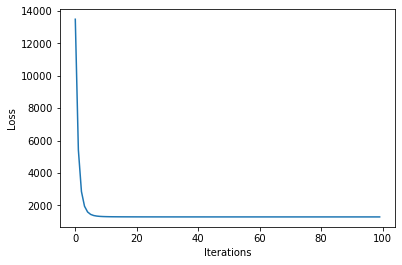

In [ ]:

from matplotlib import pyplot as plt
plt.plot(range(100), loss_hist_SGD)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


### 6. Plot the mse curves on the training and test sets using different models (w_hist). 
1. each row in w_hist_SGD is one linear model
2. apply each linear model to predict results for the training and test sets
3. calculate mse for both training and test sets.


/var/folders/53/42g8tbt17tngxpy9ywjvz0c00000gn/T/ipykernel_64558/3853184538.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


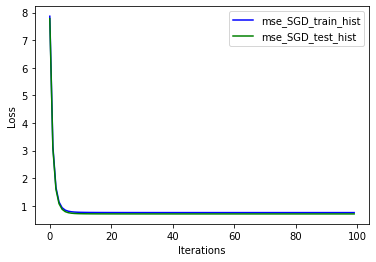

In [ ]:
n_epoches = 100
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)
mse_SGD_train_hist = np.zeros(n_epoches)
mse_SGD_test_hist = np.zeros(n_epoches)

for i in range(n_epoches):
    Y_train_SGD_pred = predict(X_train, w_hist_SGD[i])
    Y_test_SGD_pred = predict(X_test, w_hist_SGD[i])
    
    mse_SGD_train = 1/(X_train.shape[0]) * sum ((Y_train_SGD_pred - Y_train)**2)
    mse_SGD_train_hist[i] = mse_SGD_train
    mse_SGD_test = 1/(X_test.shape[0]) * sum ((Y_test_SGD_pred - Y_test)**2)
    mse_SGD_test_hist[i] = mse_SGD_test


    
from matplotlib import pyplot as plt
plt.plot(range(100), mse_SGD_train_hist,label = "mse_SGD_train_hist", color = 'b')
plt.plot(range(100), mse_SGD_test_hist, label = "mse_SGD_test_hist", color = 'g')
plt.xlabel('Iterations')
plt.legend()
plt.ylabel('Loss')
plt.show()
